# Equipo 9:
## Integrantes: 
- CRUZ MIER SAMUEL 
- JIMENEZ QUIROZ ENYA EZTLI 
- REYES SANCHEZ LAURA PAMELA 
- MARTíNEZ FLORES PATRICIO SEBASTIÁN
- MOSQUERA ALVAREZ JUAN DAVID
- OSORIO MONTENEGRO JUAN DIEGO

In [1]:
import pandas as pd
import numpy as np
from io import StringIO
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
import gower
from sklearn.metrics import silhouette_score
import prince
import seaborn as sns

In [2]:
df = pd.read_csv('EDG_1990_2021_pros.csv', sep=',')

In [3]:
df

,anio_insc,mes_insc,sexo,anio_nac,mes_nac,anio_fall,mes_fall,cod_edad,edad,est_civil,sabe_leer,prov_fall,niv_inst,cer_por,anio_base,total,ID_Causa,Causa
0,2011.0,Febrero,Hombre,1983.0,Diciembre,2011.0,Febrero,Años,27,Soltero(a),No,Imbabura,Ninguno,Médico (a) Tratante,2011.0,1.0,11,Neoplasia maligna del hígado y de las vías bil...
1,2008.0,Julio,Hombre,1934.0,Enero,2008.0,Julio,Años,74,Soltero(a),Sin información,Loja,Sin información,Médico (a) Tratante,2008.0,1.0,35,Enfermedades isquémicas del corazón
2,2010.0,Marzo,Mujer,1931.0,Diciembre,2010.0,Marzo,Años,78,Casado(a),No,Loja,Ninguno,Médico (a) Tratante,2010.0,1.0,42,Enfermedades cerebrovasculares
3,1998.0,Abril,Hombre,1991.0,Abril,1998.0,Marzo,Años,6,Sin información,Si,Cañar,Primaria,Médico (a) no Tratante,1998.0,1.0,57,Accidentes de transporte terrestre
4,2012.0,Agosto,Mujer,1956.0,Octubre,2012.0,Agosto,Años,55,Casado(a),Si,Manabí,Superior,Médico (a) Tratante,2012.0,1.0,17,Neoplasia maligna de la mama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256958,2015.0,Junio,Mujer,1947.0,Diciembre,2015.0,Junio,Años,67,Soltero(a),Si,Manabí,Primaria,Médico (a) no Tratante,2015.0,1.0,51,Cirrosis y otras enfermedades del hígado
256959,2016.0,Noviembre,Mujer,1948.0,Mayo,2016.0,Noviembre,Años,68,Casado(a),Si,Los Ríos,Primaria,Médico (a) Tratante,2016.0,1.0,26,Diabetes Mellitus
256960,2016.0,Febrero,Mujer,1954.0,Mayo,2016.0,Febrero,Años,61,Soltero(a),No,Santo Domingo de los Tsachilas,Ninguno,Médico (a) no Tratante,2016.0,1.0,26,Diabetes Mellitus
256961,2019.0,Febrero,Hombre,1970.0,Mayo,2019.0,Febrero,Años,48,Casado(a),Si,Pichincha,Primaria,Médico (a) Legista,2019.0,1.0,63,Lesiones autoinflingidas intencionalmente (Sui...


# 2. Clustering con K-Modes

In [4]:
# Definimos los parámetros del modelo:
km_2 = KModes(n_clusters=2) # Usaremos los hiperparámetros pre-establecidos

In [5]:
# Entrenamos el modelo con los datos del dataframe
clusters_2 = km_2.fit_predict(df)
clusters_2

array([1, 1, 1, ..., 0, 0, 0], dtype=uint16)

In [6]:
# Print the cluster centroids
centroides_2 = km_2.cluster_centroids_
centroides_2

array([['2020.0', 'Abril', 'Hombre', '1940.0', 'Septiembre', '2020.0',
        'Abril', 'Años', '79', 'Casado(a)', 'Si', 'Guayas', 'Primaria',
        'Médico (a) no Tratante', '2020.0', '1.0', '26',
        'Diabetes Mellitus        '],
       ['2021.0', 'Enero', 'Mujer', '1942.0', 'Julio', '2021.0', 'Enero',
        'Años', '1', 'Soltero(a)', 'Si', 'Pichincha', 'Ninguno',
        'Médico (a) Tratante', '2021.0', '1.0', '42',
        'Enfermedades cerebrovasculares        ']], dtype='<U38')

In [7]:
# Insertemos los clusters en nuestro dataframe original
df_labels = df.copy()
df_labels.insert(0,"cluster_labels", clusters_2)
df_labels

,cluster_labels,anio_insc,mes_insc,sexo,anio_nac,mes_nac,anio_fall,mes_fall,cod_edad,edad,est_civil,sabe_leer,prov_fall,niv_inst,cer_por,anio_base,total,ID_Causa,Causa
0,1,2011.0,Febrero,Hombre,1983.0,Diciembre,2011.0,Febrero,Años,27,Soltero(a),No,Imbabura,Ninguno,Médico (a) Tratante,2011.0,1.0,11,Neoplasia maligna del hígado y de las vías bil...
1,1,2008.0,Julio,Hombre,1934.0,Enero,2008.0,Julio,Años,74,Soltero(a),Sin información,Loja,Sin información,Médico (a) Tratante,2008.0,1.0,35,Enfermedades isquémicas del corazón
2,1,2010.0,Marzo,Mujer,1931.0,Diciembre,2010.0,Marzo,Años,78,Casado(a),No,Loja,Ninguno,Médico (a) Tratante,2010.0,1.0,42,Enfermedades cerebrovasculares
3,0,1998.0,Abril,Hombre,1991.0,Abril,1998.0,Marzo,Años,6,Sin información,Si,Cañar,Primaria,Médico (a) no Tratante,1998.0,1.0,57,Accidentes de transporte terrestre
4,1,2012.0,Agosto,Mujer,1956.0,Octubre,2012.0,Agosto,Años,55,Casado(a),Si,Manabí,Superior,Médico (a) Tratante,2012.0,1.0,17,Neoplasia maligna de la mama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256958,0,2015.0,Junio,Mujer,1947.0,Diciembre,2015.0,Junio,Años,67,Soltero(a),Si,Manabí,Primaria,Médico (a) no Tratante,2015.0,1.0,51,Cirrosis y otras enfermedades del hígado
256959,0,2016.0,Noviembre,Mujer,1948.0,Mayo,2016.0,Noviembre,Años,68,Casado(a),Si,Los Ríos,Primaria,Médico (a) Tratante,2016.0,1.0,26,Diabetes Mellitus
256960,0,2016.0,Febrero,Mujer,1954.0,Mayo,2016.0,Febrero,Años,61,Soltero(a),No,Santo Domingo de los Tsachilas,Ninguno,Médico (a) no Tratante,2016.0,1.0,26,Diabetes Mellitus
256961,0,2019.0,Febrero,Hombre,1970.0,Mayo,2019.0,Febrero,Años,48,Casado(a),Si,Pichincha,Primaria,Médico (a) Legista,2019.0,1.0,63,Lesiones autoinflingidas intencionalmente (Sui...


# 3. Determinando el valor adecuado de K

In [8]:
# Determinamos el valor óptimo de K
# Este cálculo toma bastante tiempo con muchos datos
cost_red = []
K_red = range(1,10)
for num_clusters in list(K_red):
  kmode_red = KModes(n_clusters=num_clusters) # Usaremos los hiperparámetros pre-establecidos
  kmode_red.fit_predict(df)
  cost_red.append(kmode_red.cost_)

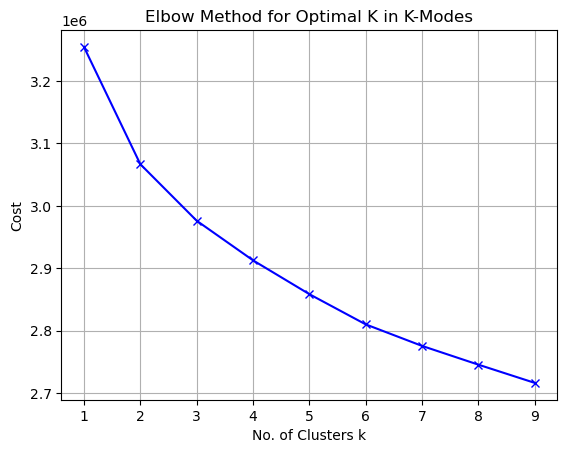

In [9]:
# Realizamos el gráfico de codo
# Importamos la librería Matplotlib
plt.grid('True')
plt.plot(K_red, cost_red, 'bx-')
plt.xlabel('No. of Clusters k')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal K in K-Modes')
plt.show()

In [26]:
#Posibles codos en K=2 y K=3

In [25]:
#Para poder discernir cual es mejor, podemos usar una métrica como el Average Silhouette Score.

## Con dos clusters

In [17]:
# Construimos el modelo con 2 clusters
kmode_2 = KModes(n_clusters=2) # Usaremos los hiperparámetros pre-establecidos
clusters_2 = kmode_2.fit_predict(df)
clusters_2

array([1, 1, 1, ..., 0, 0, 0], dtype=uint16)

In [18]:
# Insertemos las etiquetas en nuestro dataset original.
df_labels2 = df.copy()
df_labels2.insert(0,"cluster_labels", clusters_2)
df_labels2

,cluster_labels,anio_insc,mes_insc,sexo,anio_nac,mes_nac,anio_fall,mes_fall,cod_edad,edad,est_civil,sabe_leer,prov_fall,niv_inst,cer_por,anio_base,total,ID_Causa,Causa
0,1,2011.0,Febrero,Hombre,1983.0,Diciembre,2011.0,Febrero,Años,27,Soltero(a),No,Imbabura,Ninguno,Médico (a) Tratante,2011.0,1.0,11,Neoplasia maligna del hígado y de las vías bil...
1,1,2008.0,Julio,Hombre,1934.0,Enero,2008.0,Julio,Años,74,Soltero(a),Sin información,Loja,Sin información,Médico (a) Tratante,2008.0,1.0,35,Enfermedades isquémicas del corazón
2,1,2010.0,Marzo,Mujer,1931.0,Diciembre,2010.0,Marzo,Años,78,Casado(a),No,Loja,Ninguno,Médico (a) Tratante,2010.0,1.0,42,Enfermedades cerebrovasculares
3,0,1998.0,Abril,Hombre,1991.0,Abril,1998.0,Marzo,Años,6,Sin información,Si,Cañar,Primaria,Médico (a) no Tratante,1998.0,1.0,57,Accidentes de transporte terrestre
4,1,2012.0,Agosto,Mujer,1956.0,Octubre,2012.0,Agosto,Años,55,Casado(a),Si,Manabí,Superior,Médico (a) Tratante,2012.0,1.0,17,Neoplasia maligna de la mama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256958,0,2015.0,Junio,Mujer,1947.0,Diciembre,2015.0,Junio,Años,67,Soltero(a),Si,Manabí,Primaria,Médico (a) no Tratante,2015.0,1.0,51,Cirrosis y otras enfermedades del hígado
256959,0,2016.0,Noviembre,Mujer,1948.0,Mayo,2016.0,Noviembre,Años,68,Casado(a),Si,Los Ríos,Primaria,Médico (a) Tratante,2016.0,1.0,26,Diabetes Mellitus
256960,0,2016.0,Febrero,Mujer,1954.0,Mayo,2016.0,Febrero,Años,61,Soltero(a),No,Santo Domingo de los Tsachilas,Ninguno,Médico (a) no Tratante,2016.0,1.0,26,Diabetes Mellitus
256961,0,2019.0,Febrero,Hombre,1970.0,Mayo,2019.0,Febrero,Años,48,Casado(a),Si,Pichincha,Primaria,Médico (a) Legista,2019.0,1.0,63,Lesiones autoinflingidas intencionalmente (Sui...


In [24]:
# Calculo de Average Silhouette Score
# Convertir todas las columnas categóricas a strings
df_str = df_labels2.applymap(str)

#Sacamos una muestra, en caso contrario la memoria RAM no será suficiente
df_str = df_str.sample(n=20000, random_state=1)

# Luego calcular la matriz de distancias de Gower como antes
gower_distances = gower.gower_matrix(df_str.drop('cluster_labels', axis=1))

# Calcular el Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_str['cluster_labels'], metric='precomputed')
print("Average Categorical Silhouette Score con K = 2:", silhouette_avg_gower)

Average Categorical Silhouette Score con K = 2: 0.042030107


20000: 0.042
1000: 0.046
5000: 0.041

## Con tres clusters

In [13]:
# Construimos el modelo con 3 clusters
kmode_3 = KModes(n_clusters=3)
clusters_3 = kmode_3.fit_predict(df)
clusters_3

array([1, 2, 1, ..., 0, 0, 0], dtype=uint16)

In [14]:
# Insertemos las etiquetas en nuestro dataset original.
df_labels3 = df.copy()
df_labels3.insert(0,"cluster_labels", clusters_3)
df_labels3

,cluster_labels,anio_insc,mes_insc,sexo,anio_nac,mes_nac,anio_fall,mes_fall,cod_edad,edad,est_civil,sabe_leer,prov_fall,niv_inst,cer_por,anio_base,total,ID_Causa,Causa
0,1,2011.0,Febrero,Hombre,1983.0,Diciembre,2011.0,Febrero,Años,27,Soltero(a),No,Imbabura,Ninguno,Médico (a) Tratante,2011.0,1.0,11,Neoplasia maligna del hígado y de las vías bil...
1,2,2008.0,Julio,Hombre,1934.0,Enero,2008.0,Julio,Años,74,Soltero(a),Sin información,Loja,Sin información,Médico (a) Tratante,2008.0,1.0,35,Enfermedades isquémicas del corazón
2,1,2010.0,Marzo,Mujer,1931.0,Diciembre,2010.0,Marzo,Años,78,Casado(a),No,Loja,Ninguno,Médico (a) Tratante,2010.0,1.0,42,Enfermedades cerebrovasculares
3,0,1998.0,Abril,Hombre,1991.0,Abril,1998.0,Marzo,Años,6,Sin información,Si,Cañar,Primaria,Médico (a) no Tratante,1998.0,1.0,57,Accidentes de transporte terrestre
4,1,2012.0,Agosto,Mujer,1956.0,Octubre,2012.0,Agosto,Años,55,Casado(a),Si,Manabí,Superior,Médico (a) Tratante,2012.0,1.0,17,Neoplasia maligna de la mama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256958,0,2015.0,Junio,Mujer,1947.0,Diciembre,2015.0,Junio,Años,67,Soltero(a),Si,Manabí,Primaria,Médico (a) no Tratante,2015.0,1.0,51,Cirrosis y otras enfermedades del hígado
256959,0,2016.0,Noviembre,Mujer,1948.0,Mayo,2016.0,Noviembre,Años,68,Casado(a),Si,Los Ríos,Primaria,Médico (a) Tratante,2016.0,1.0,26,Diabetes Mellitus
256960,0,2016.0,Febrero,Mujer,1954.0,Mayo,2016.0,Febrero,Años,61,Soltero(a),No,Santo Domingo de los Tsachilas,Ninguno,Médico (a) no Tratante,2016.0,1.0,26,Diabetes Mellitus
256961,0,2019.0,Febrero,Hombre,1970.0,Mayo,2019.0,Febrero,Años,48,Casado(a),Si,Pichincha,Primaria,Médico (a) Legista,2019.0,1.0,63,Lesiones autoinflingidas intencionalmente (Sui...


In [16]:
# Calculo de Average Silhouette Score
# Convertir todas las columnas categóricas a strings
df_str = df_labels3.applymap(str)

#Sacamos una muestra, en caso contrario la memoria RAM no será suficiente
df_str = df_str.sample(n=10000, random_state=1)

# Luego calcular la matriz de distancias de Gower como antes
gower_distances = gower.gower_matrix(df_str.drop('cluster_labels', axis=1))

# Calcular el Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_str['cluster_labels'], metric='precomputed')
print("Average Categorical Silhouette Score con K = 3:", silhouette_avg_gower)

Average Categorical Silhouette Score con K = 3: 0.019452082


## Prueba con 4 clusters

In [10]:
# Construimos el modelo con 4 clusters
kmode_4 = KModes(n_clusters=4)
clusters_4 = kmode_4.fit_predict(df)
clusters_4

array([1, 2, 1, ..., 0, 0, 3], dtype=uint16)

In [12]:
# Insertemos las etiquetas en nuestro dataset original.
df_labels4 = df.copy()
df_labels4.insert(0,"cluster_labels", clusters_4)

In [13]:
# Calculo de Average Silhouette Score
# Convertir todas las columnas categóricas a strings
df_str = df_labels4.applymap(str)

#Sacamos una muestra, en caso contrario la memoria RAM no será suficiente
df_str = df_str.sample(n=10000, random_state=1)

# Luego calcular la matriz de distancias de Gower como antes
gower_distances = gower.gower_matrix(df_str.drop('cluster_labels', axis=1))

# Calcular el Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_str['cluster_labels'], metric='precomputed')
print("Average Categorical Silhouette Score con K = 4:", silhouette_avg_gower)

Average Categorical Silhouette Score con K = 4: 0.017879039


# 4. Visualización de los clusters

In [25]:
# Aplicamos MCA para reducir la dimensionalidad del dataset original
# Veamos las variables que tenemos:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256963 entries, 0 to 256962
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   anio_insc  256963 non-null  float64
 1   mes_insc   256963 non-null  object 
 2   sexo       256963 non-null  object 
 3   anio_nac   256963 non-null  float64
 4   mes_nac    256963 non-null  object 
 5   anio_fall  256963 non-null  float64
 6   mes_fall   256963 non-null  object 
 7   cod_edad   256963 non-null  object 
 8   edad       256963 non-null  int64  
 9   est_civil  256963 non-null  object 
 10  sabe_leer  256963 non-null  object 
 11  prov_fall  256963 non-null  object 
 12  niv_inst   256963 non-null  object 
 13  cer_por    256963 non-null  object 
 14  anio_base  256963 non-null  float64
 15  total      256963 non-null  float64
 16  ID_Causa   256963 non-null  int64  
 17  Causa      256963 non-null  object 
dtypes: float64(5), int64(2), object(11)
memory usage: 35.3+ MB


In [26]:
# Transformamos las variables no categóricas a variables tipo dummy
df_categorical = pd.get_dummies(df)
df_categorical

,anio_insc,anio_nac,anio_fall,edad,anio_base,total,ID_Causa,mes_insc_88.0,mes_insc_99.0,mes_insc_Abril,...,"Causa_Neoplasia maligna del riñón, excepto pelvis renal","Causa_Neoplasia maligna del tejido linfático, hematopoyético y afinies",Causa_Neoplasia maligna del útero,Causa_Neoplasias benignas in situ y de comportamiento incierto,Causa_Paro cardíaco,Causa_Septicemia,"Causa_Trastornos de los líquidos, electrolitos, y del equilibrio ácido básico",Causa_Trastornos mentales y del comportamiento por uso de sustancias psicoactivas,Causa_Trastornos valvulares no reumáticos,Causa_Tuberculosis
0,2011.0,1983.0,2011.0,27,2011.0,1.0,11,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2008.0,1934.0,2008.0,74,2008.0,1.0,35,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2010.0,1931.0,2010.0,78,2010.0,1.0,42,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1998.0,1991.0,1998.0,6,1998.0,1.0,57,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,2012.0,1956.0,2012.0,55,2012.0,1.0,17,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256958,2015.0,1947.0,2015.0,67,2015.0,1.0,51,False,False,False,...,False,False,False,False,False,False,False,False,False,False
256959,2016.0,1948.0,2016.0,68,2016.0,1.0,26,False,False,False,...,False,False,False,False,False,False,False,False,False,False
256960,2016.0,1954.0,2016.0,61,2016.0,1.0,26,False,False,False,...,False,False,False,False,False,False,False,False,False,False
256961,2019.0,1970.0,2019.0,48,2019.0,1.0,63,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
# Indicamos el número de componentes que requerimos, que en este caso es dos.
mca = prince.MCA(n_components=2)
# Ajustamos MCA a nuestros datos
mca = mca.fit(df_categorical)
mca

# Transforme el conjunto de datos (esto le dará las coordenadas de cada muestra en los nuevos ejes)
mca_coordinates = mca.transform(df_categorical)
mca_coordinates

,0,1
0,-0.016988,-0.093148
1,0.066776,-0.074252
2,-0.016829,-0.244238
3,0.066744,0.045107
4,-0.122983,-0.040325
...,...,...
256958,-0.126956,0.078755
256959,-0.123797,-0.000473
256960,-0.040731,0.038864
256961,-0.137624,0.280556


In [28]:
# Agregamos una columna con la etiqueta de los clusters. K = 2
mca_coordinates['cluster_labels'] = df_labels2['cluster_labels']
mca_coordinates.head()

,0,1,cluster_labels
0,-0.016988,-0.093148,1
1,0.066776,-0.074252,1
2,-0.016829,-0.244238,1
3,0.066744,0.045107,0
4,-0.122983,-0.040325,1


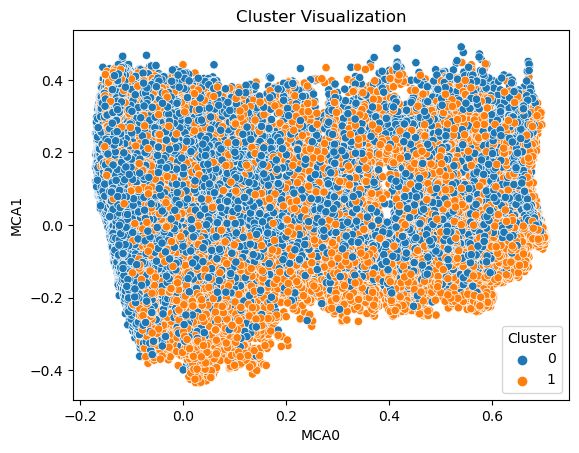

In [29]:
# Dibujamos los clusters
# Dibuja el diagrama de dispersión coloreando los puntos por grupo.
sns.scatterplot(data=mca_coordinates, x=mca_coordinates.iloc[:, 0], y=mca_coordinates.iloc[:, 1], hue='cluster_labels')
# Agregar una leyenda
plt.legend(title='Cluster')
# Optional: Add title and axis labels
plt.title('Cluster Visualization')
plt.xlabel('MCA0')
plt.ylabel('MCA1')
# Show the plot
plt.show()